<a href="https://colab.research.google.com/github/georgsmeinung/rn1-perceptron/blob/main/RN-Clase02/Comb_LINEAL_CCPP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
ColabNotebook = 'google.colab' in str(get_ipython())

if ColabNotebook:
    # monta G-drive en entorno COLAB
    from google.colab import drive
    drive.mount('/content/drive/')

    # carpeta donde se encuentran archivos .py auxiliares
    FUENTES_DIR = '/content/drive/MyDrive/Colab Notebooks/FUENTES/'
    DATOS_DIR = '/content/drive/MyDrive/Colab Notebooks/DATOS/'      # carpeta donde se encuentran los datasets
else:
    # configuración para notebook con instalación LOCAL
    FUENTES_DIR = '../Fuentes'         # carpeta donde se encuentran archivos .py auxiliares
    DATOS_DIR   = '../Datos/' # carpeta donde se encuentran los datasets

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

Mounted at /content/drive/


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import time
#from matplotlib import pyplot as plt
from matplotlib import pylab as plt
from IPython import display
# Ajustar el tamaño predeterminado de las figuras
plt.rcParams['figure.figsize'] = [4,3]

from grafica import *

In [6]:
datos= pd.read_csv(DATOS_DIR+'CCPP.csv')
T = np.array(datos['PE'])
X = np.array(datos['AT'])
X = X.reshape(-1,1)
cantEj = X.shape[0]  # cantidad de ejemplos de entrada
# -- para el dibujo --
puntos = np.array(datos[['AT','PE']])
titulos = np.array(['AT','PE'])

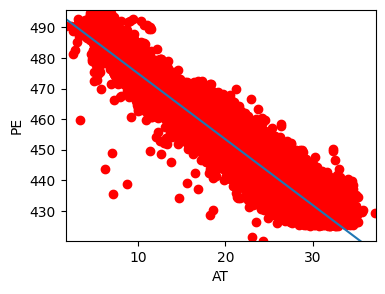

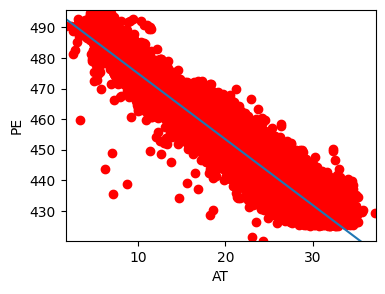

In [7]:
# -- PESOS INICIALES - Determinan la ubicación de la recta
W = np.array([-2.16])
b = 496.61

dibuPtosRecta(puntos, np.zeros(puntos.shape[0]), np.array([W, -1],dtype=object),b, titulos)

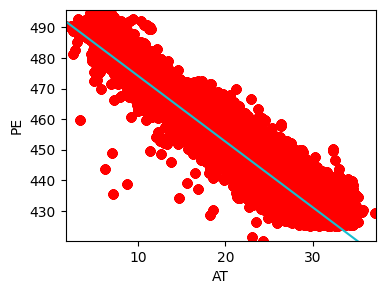

ite 50


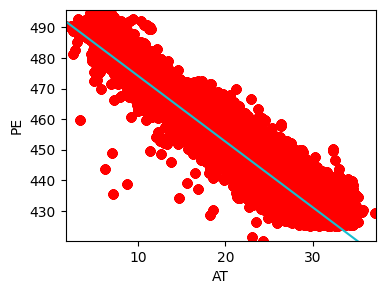

In [8]:
# --- titulos y ph se utilizan sólo para dibujar ---
titulos = np.array(['AT','PE'])
ph=0

#--- parámetros del PERCEPTRON ---
MAX_ITE = 50
alfa = 0.0001

#--- Los pesos iniciales son aleatorios
W = np.random.uniform(-0.5, 0.5,size=X.shape[1])
b = np.random.uniform(-0.5, 0.5)

#--- al finalizar ERRORES debe contener la cantidad de cambios realizados en c/iteración ---
errores = []

# --- Entrenamiento del combinador lineal ---
nCantEjemplos = X.shape[0]  # nro. de filas
nAtrib = X.shape[1]         #nro. de columnas

ite = 0
ErrorAnt = 0
ErrorAct = 1
cotaError = 0.001

while (ite < MAX_ITE) and (np.abs(ErrorAnt- ErrorAct) > cotaError):
    # comienza una época
    ErrorAnt = ErrorAct
    ErrorAct = 0

    for e in range(nCantEjemplos):
        # Calcular y  (la salida del combinador lineal)
        neta = W * X[e] + b
        y = neta

        errorXi = T[e]-y

        W = W + alfa * errorXi * X[e]
        b = b + alfa * errorXi

        ErrorAct = ErrorAct + errorXi**2

    errores.append(ErrorAct)
    # graficar la recta
    ph = dibuPtosRecta(puntos, np.zeros(puntos.shape[0]), np.array([W, -1],dtype=object),b, titulos, ph)

    ite = ite + 1
    print("ite %d" % ite)

In [9]:
print("W = ", W)
print("b = ", b)

W =  [-2.15658426]
b =  [495.78752644]


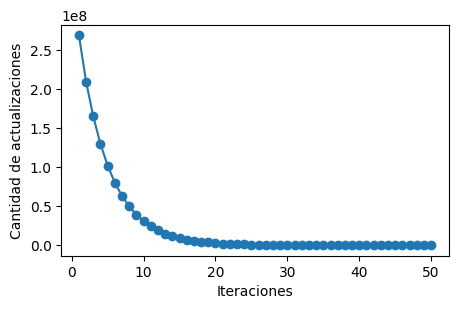

In [10]:
plt.figure(figsize=(5, 3))
plt.plot(range(1, len(errores) + 1), errores, marker='o')
plt.xlabel('Iteraciones')
plt.ylabel('Cantidad de actualizaciones')
plt.show()